In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv(r'C:\\Users\\NAMO\\Desktop\\datasets\\HR_comma_sep.csv')

In [4]:
# Display the first few rows of the dataset
print(df.head())

   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years  sales  \
0                   3              0     1                      0  sales   
1                   6              0     1                      0  sales   
2                   4              0     1                      0  sales   
3                   5              0     1                      0  sales   
4                   3              0     1                      0  sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4 

In [5]:
# Check for missing values
print(df.isnull().sum())

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64


In [8]:
# Encode categorical variables (assuming 'salary' and 'sales' are categorical)
df = pd.get_dummies(df, columns=['salary', 'sales'], drop_first=True)

In [9]:
# Separate features and target variable
X = df.drop('left', axis=1)
y = df['left']

In [10]:
# Feature scaling
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
#Exploratory Data Analysis (EDA)
import seaborn as sns
import matplotlib.pyplot as plt

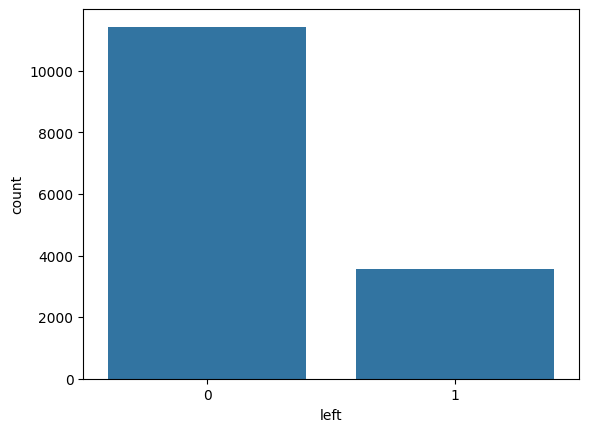

In [15]:
# Plot the distribution of the target variable
sns.countplot(x='left', data=df)
plt.show()

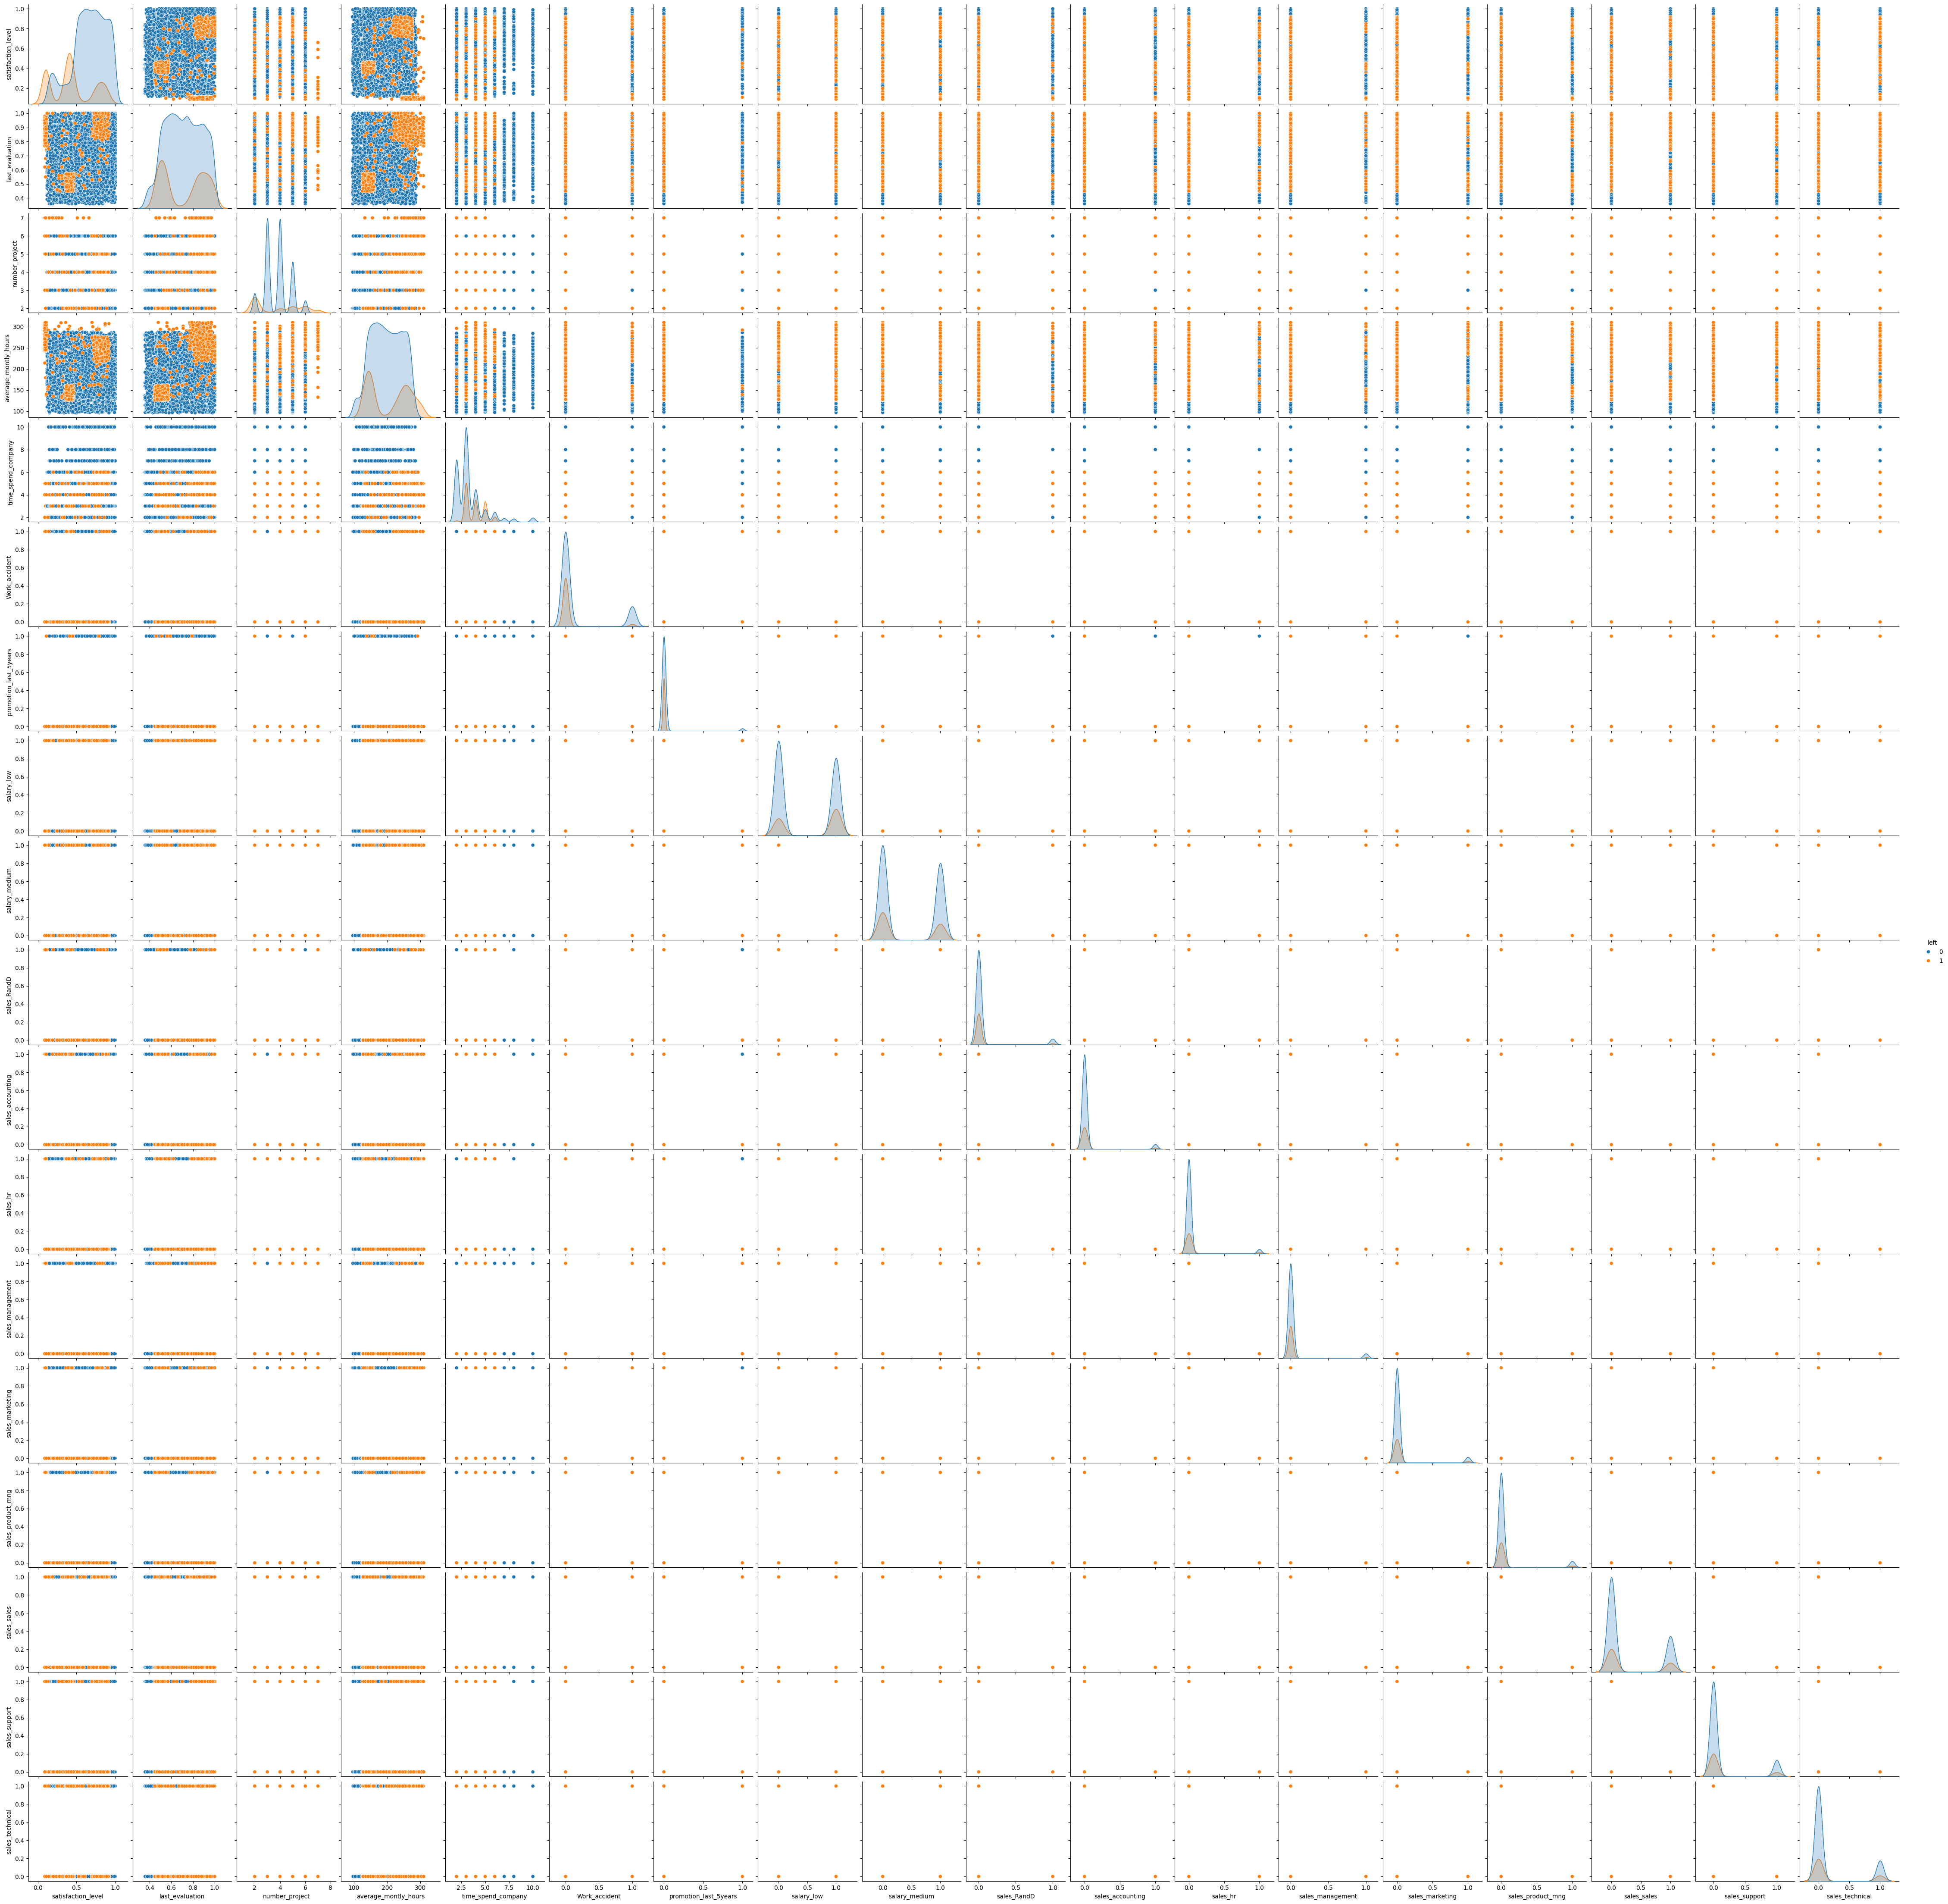

In [24]:
# Pair plot to see relationships between features
sns.pairplot(df, hue='left')
plt.show()

In [25]:
# Correlation matrix
corr_matrix = df.corr()

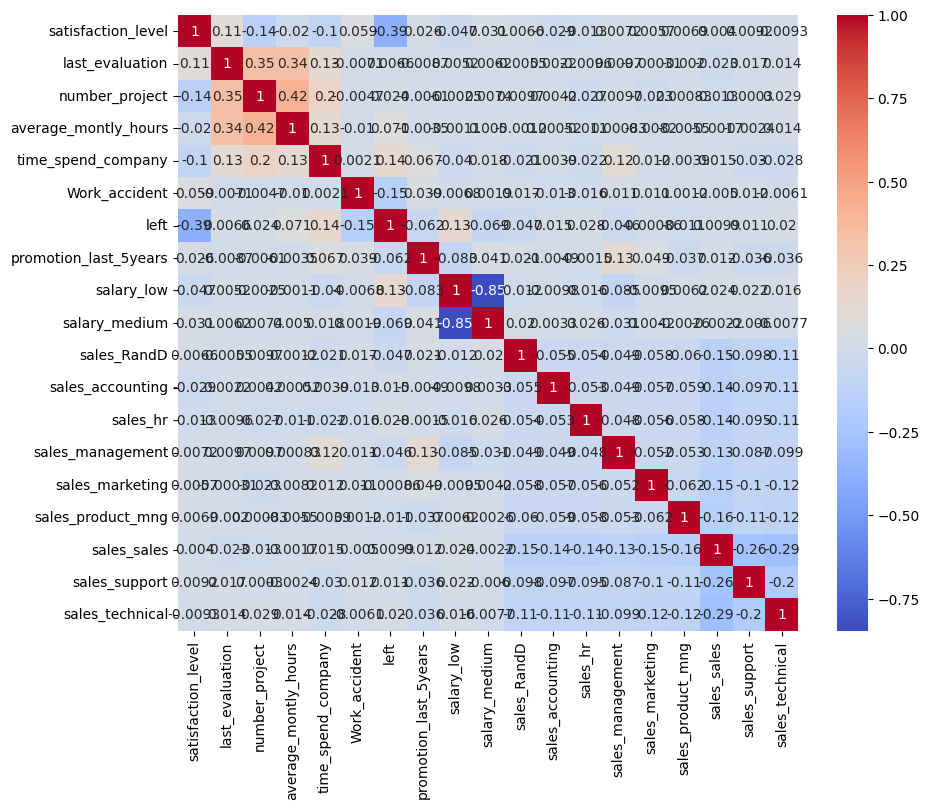

In [22]:
# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [27]:
# Example of feature engineering: creating interaction terms
df['satisfaction_time_spend'] = df['satisfaction_level'] * df['time_spend_company']

In [28]:
#Model Building
from sklearn.model_selection import train_test_split

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [29]:
# Import classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [30]:
# Initialize models
rf = RandomForestClassifier(random_state=42)
lr = LogisticRegression(random_state=42)
svc = SVC(random_state=42)
knn = KNeighborsClassifier()

In [31]:
# Train models
rf.fit(X_train, y_train)
lr.fit(X_train, y_train)
svc.fit(X_train, y_train)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [32]:
#model evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Define a function to evaluate models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
    print(f'Precision: {precision_score(y_test, y_pred)}')
    print(f'Recall: {recall_score(y_test, y_pred)}')
    print(f'F1 Score: {f1_score(y_test, y_pred)}')
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

In [33]:
# Evaluate RandomForest
print("Random Forest Classifier:")
evaluate_model(rf, X_test, y_test)

Random Forest Classifier:
Accuracy: 0.9876666666666667
Precision: 0.9854862119013063
Recall: 0.9617563739376771
F1 Score: 0.9734767025089606
[[2284   10]
 [  27  679]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2294
           1       0.99      0.96      0.97       706

    accuracy                           0.99      3000
   macro avg       0.99      0.98      0.98      3000
weighted avg       0.99      0.99      0.99      3000



In [34]:
# Evaluate Logistic Regression
print("Logistic Regression Classifier:")
evaluate_model(lr, X_test, y_test)

Logistic Regression Classifier:
Accuracy: 0.7843333333333333
Precision: 0.5710843373493976
Recall: 0.3356940509915014
F1 Score: 0.42283675289919714
[[2116  178]
 [ 469  237]]
              precision    recall  f1-score   support

           0       0.82      0.92      0.87      2294
           1       0.57      0.34      0.42       706

    accuracy                           0.78      3000
   macro avg       0.69      0.63      0.65      3000
weighted avg       0.76      0.78      0.76      3000



In [35]:
# Evaluate SVC
print("Support Vector Classifier:")
evaluate_model(svc, X_test, y_test)

Support Vector Classifier:
Accuracy: 0.9513333333333334
Precision: 0.9
Recall: 0.8923512747875354
F1 Score: 0.8961593172119487
[[2224   70]
 [  76  630]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2294
           1       0.90      0.89      0.90       706

    accuracy                           0.95      3000
   macro avg       0.93      0.93      0.93      3000
weighted avg       0.95      0.95      0.95      3000



In [36]:
# Evaluate KNN
print("K-Nearest Neighbors Classifier:")
evaluate_model(knn, X_test, y_test)

K-Nearest Neighbors Classifier:


C:\Users\NAMO\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\NAMO\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\NAMO\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\NAMO\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File

Accuracy: 0.943
Precision: 0.8679504814305364
Recall: 0.8937677053824362
F1 Score: 0.8806699232379623
[[2198   96]
 [  75  631]]
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      2294
           1       0.87      0.89      0.88       706

    accuracy                           0.94      3000
   macro avg       0.92      0.93      0.92      3000
weighted avg       0.94      0.94      0.94      3000



In [37]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning for RandomForest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)
print("Best estimator found: ", grid_search.best_estimator_)

# Evaluate the tuned model
best_rf = grid_search.best_estimator_
evaluate_model(best_rf, X_test, y_test)


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters found:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best estimator found:  RandomForestClassifier(n_estimators=200, random_state=42)
Accuracy: 0.988
Precision: 0.9869186046511628
Recall: 0.9617563739376771
F1 Score: 0.9741750358680057
[[2285    9]
 [  27  679]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2294
           1       0.99      0.96      0.97       706

    accuracy                           0.99      3000
   macro avg       0.99      0.98      0.98      3000
weighted avg       0.99      0.99      0.99      3000



In [39]:
# Feature importance for RandomForest
importances = best_rf.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

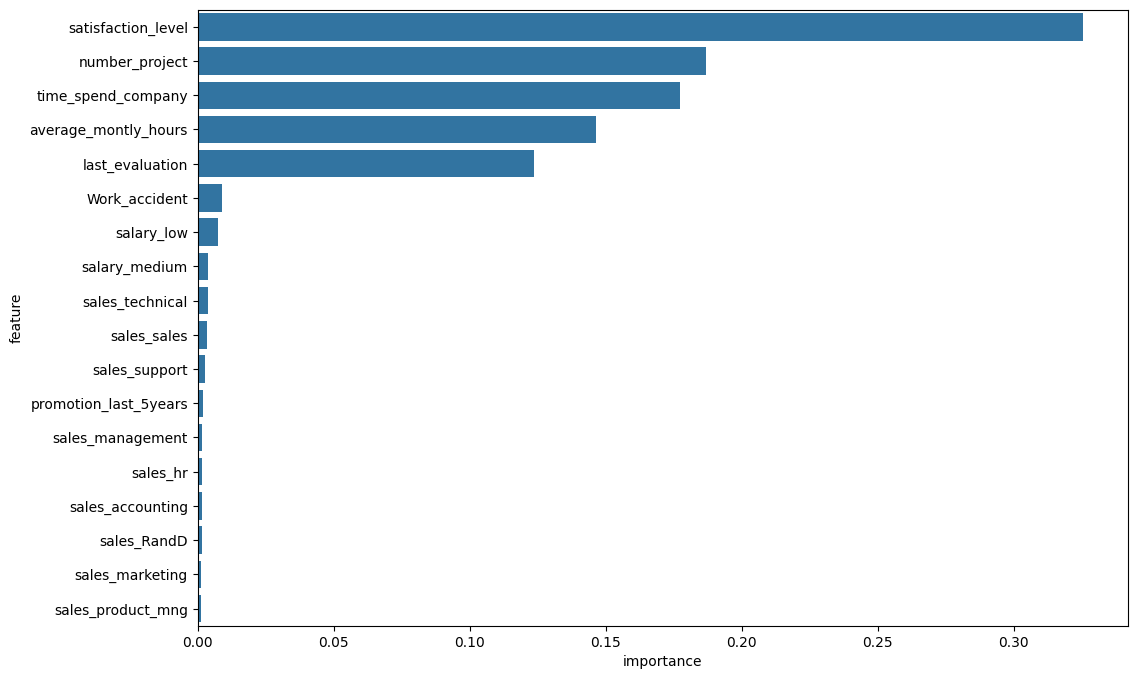

In [40]:
# Plot feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importance_df)
plt.show()